# Librerias

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import models, optimizers, regularizers
from keras.models import load_model

## Creación Modelo Convolucional

In [2]:
model = models.Sequential()

model.add(Conv2D(32, (3,3), activation = 'relu', input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(128, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,453,121 (13.17 MB)

 Trainable params: 3,453,121 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

## Cargar dataset

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("unmoved/30k-cats-and-dogs-150x150-greyscale")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/30k-cats-and-dogs-150x150-greyscale


## Split de datos

In [4]:
import os
import shutil
import random

# Definir rutas
dataset_path = os.path.join(path, "Animal Images")
output_base_dir = "split_dataset"  # Carpeta donde se dividirán los datos

# Crear carpetas para train, validation y test
splits = ['train', 'validation', 'test']
categories = ['cats', 'dogs']

for split in splits:
    for category in categories:
        os.makedirs(os.path.join(output_base_dir, split, category), exist_ok=True)

# Función para dividir y copiar imágenes
def split_and_copy(source_dir, output_dir, split_ratios=(0.7, 0.15, 0.15)):
    images = os.listdir(source_dir)
    random.shuffle(images)  # Mezclar las imágenes
    
    total_images = len(images)
    train_idx = int(split_ratios[0] * total_images)
    val_idx = train_idx + int(split_ratios[1] * total_images)
    
    # Asignar imágenes a cada split
    train_images = images[:train_idx]
    val_images = images[train_idx:val_idx]
    test_images = images[val_idx:]
    
    # Copiar imágenes a las carpetas correspondientes
    for img in train_images:
        shutil.copy(os.path.join(source_dir, img), os.path.join(output_dir, 'train', category, img))
    for img in val_images:
        shutil.copy(os.path.join(source_dir, img), os.path.join(output_dir, 'validation', category, img))
    for img in test_images:
        shutil.copy(os.path.join(source_dir, img), os.path.join(output_dir, 'test', category, img))

# Dividir imágenes de Cats y Dogs
for category in categories:
    source_dir = os.path.join(dataset_path, category)
    split_and_copy(source_dir, output_base_dir)

print("Dataset dividido en train, validation y test.")

Dataset dividido en train, validation y test.


## Data Augmentation

In [5]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2, 
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

## Reescalar Datos

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [7]:
train_generator = train_datagen.flow_from_directory('/kaggle/working/split_dataset/train',
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode='binary'
                                                   )

validation_generator = test_datagen.flow_from_directory('/kaggle/working/split_dataset/validation',
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode='binary'
                                                   )

Found 21042 images belonging to 2 classes.
Found 4509 images belonging to 2 classes.


In [39]:
def plotImage(images_arr):
  fig, axes = plt.subplots(1, 5, figsize=(20, 20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img[:,:,0])
    ax.axis('off')
  plt.tight_layout()
  plt.show

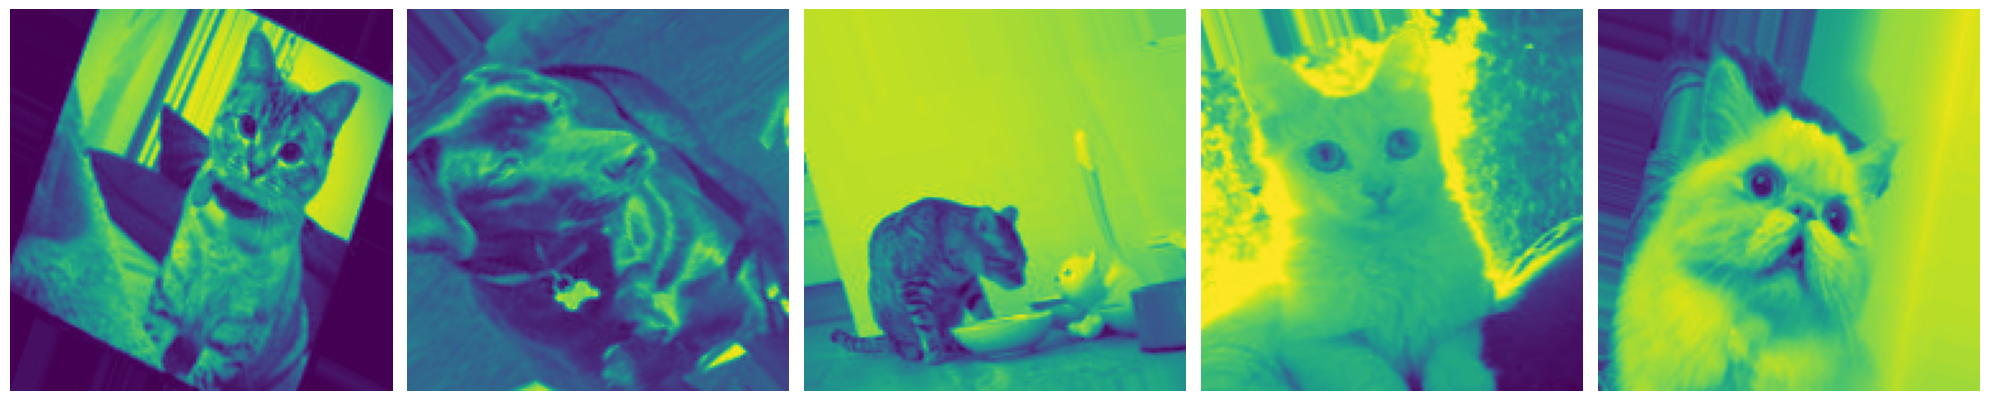

In [40]:
sample_trining_images, _ = next(train_generator)
plotImage(sample_trining_images[:5])

ModuleNotFoundError: No module named 'imutils'

## Checkpoint

In [8]:
checkpoint = ModelCheckpoint('dogs_cats_model.keras', monitor = 'val_accuracy', verbose = 1,
                             save_best_only = True)

## Compile

In [9]:
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(),
             metrics = ['accuracy'])

## Entrenamiento

In [10]:
hist = model.fit(train_generator, steps_per_epoch = 2000//32,
                epochs = 100,
                validation_data = validation_generator,
                validation_steps = 1000//32,
                callbacks = [checkpoint])

Epoch 1/100


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1734652096.188261      85 service.cc:145] XLA service 0x7c957c004550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734652096.188322      85 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1734652096.188326      85 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 1/62 ━━━━━━━━━━━━━━━━━━━━ 9:09 9s/step - accuracy: 0.3750 - loss: 0.7224

I0000 00:00:1734652102.175269      85 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.4847 - loss: 0.7186
Epoch 1: val_accuracy improved from -inf to 0.58367, saving model to dogs_cats_model.keras
62/62 ━━━━━━━━━━━━━━━━━━━━ 20s 181ms/step - accuracy: 0.4851 - loss: 0.7183 - val_accuracy: 0.5837 - val_loss: 0.6921
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step - accuracy: 0.5131 - loss: 0.6925
Epoch 2: val_accuracy did not improve from 0.58367
62/62 ━━━━━━━━━━━━━━━━━━━━ 13s 216ms/step - accuracy: 0.5132 - loss: 0.6925 - val_accuracy: 0.4919 - val_loss: 0.7016
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5331 - loss: 0.6891
Epoch 3: val_accuracy did not improve from 0.58367
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 163ms/step - accuracy: 0.5332 - loss: 0.6890 - val_accuracy: 0.5252 - val_loss: 0.6924
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.5198 - loss: 0.6904
Epoch 4: val_accuracy did not improve from 0.58367
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - accuracy: 0.5201 - los

/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


62/62 ━━━━━━━━━━━━━━━━━━━━ 11s 177ms/step - accuracy: 0.5455 - loss: 0.6861 - val_accuracy: 0.6617 - val_loss: 0.6304
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step - accuracy: 0.5575 - loss: 0.6860
Epoch 6: val_accuracy did not improve from 0.66174
62/62 ━━━━━━━━━━━━━━━━━━━━ 9s 154ms/step - accuracy: 0.5574 - loss: 0.6860 - val_accuracy: 0.6149 - val_loss: 0.6726
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 152ms/step - accuracy: 0.5522 - loss: 0.6811
Epoch 7: val_accuracy did not improve from 0.66174
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.5525 - loss: 0.6810 - val_accuracy: 0.6179 - val_loss: 0.6479
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step - accuracy: 0.6171 - loss: 0.6590
Epoch 8: val_accuracy did not improve from 0.66174
62/62 ━━━━━━━━━━━━━━━━━━━━ 10s 164ms/step - accuracy: 0.6165 - loss: 0.6593 - val_accuracy: 0.6190 - val_loss: 0.6565
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6134 - loss: 0.6714
Epoch 9: val_accuracy did no

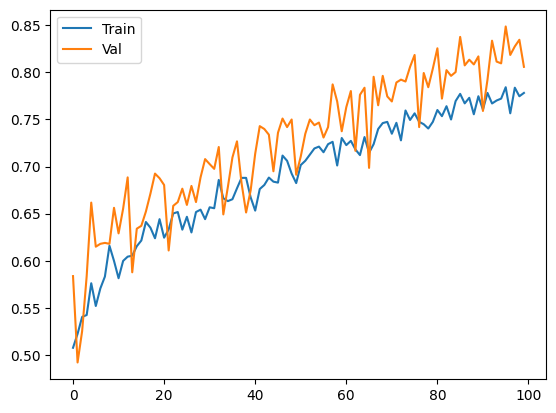

In [11]:
import matplotlib.pyplot as plt
plt.plot(hist.history['accuracy'], label = 'Train')
plt.plot(hist.history['val_accuracy'], label = 'Val')
plt.legend()
plt.show()

In [12]:
test_generator = test_datagen.flow_from_directory('/kaggle/working/split_dataset/test',
                                                    target_size = (150,150),
                                                    batch_size = 32,
                                                    class_mode='binary'
                                                   )

Found 4510 images belonging to 2 classes.


In [13]:
model.save('model_cat.keras')

In [14]:
model_loaded = load_model('model_cat.keras')

In [15]:
predictions = model_loaded.predict(validation_generator)
print(predictions)

141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 20ms/step
[[0.080812  ]
 [0.45401952]
 [0.963514  ]
 ...
 [0.9080116 ]
 [0.9460015 ]
 [0.07837835]]


In [16]:
testing = model_loaded.evaluate(test_generator)
print(testing)

141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.8011 - loss: 0.4045
[0.4148026704788208, 0.7980044484138489]


---------------

In [17]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import models, optimizers, regularizers


In [18]:
# Modelo con Batch Normalization y Regularización L2
def create_model(dropout_rate=0.5, l2_lambda=0.001):
    model = models.Sequential()

    # Primera capa convolucional
    model.add(Conv2D(32, (3,3), kernel_regularizer=regularizers.l2(l2_lambda), input_shape=(150,150,3)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D((2,2)))

    # Segunda capa convolucional
    model.add(Conv2D(64, (3,3), kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D((2,2)))

    # Tercera capa convolucional
    model.add(Conv2D(128, (3,3), kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D((2,2)))

    # Cuarta capa convolucional
    model.add(Conv2D(128, (3,3), kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(BatchNormalization())
    model.add(tf.keras.layers.Activation('relu'))
    model.add(MaxPooling2D((2,2)))

    # Capa Fully Connected
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
    model.add(Dense(1, activation='sigmoid'))  # Salida para clasificación binaria
    
    return model

In [19]:
l2_lambda=0.001

model = models.Sequential()

# Primera capa convolucional
model.add(Conv2D(32, (3,3), kernel_regularizer=regularizers.l2(l2_lambda), input_shape=(150,150,3)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPooling2D((2,2)))

# Segunda capa convolucional
model.add(Conv2D(64, (3,3), kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPooling2D((2,2)))

# Tercera capa convolucional
model.add(Conv2D(128, (3,3), kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPooling2D((2,2)))

# Cuarta capa convolucional
model.add(Conv2D(128, (3,3), kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(BatchNormalization())
model.add(tf.keras.layers.Activation('relu'))
model.add(MaxPooling2D((2,2)))

# Capa Fully Connected
model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu', kernel_regularizer=regularizers.l2(l2_lambda)))
model.add(Dense(1, activation='sigmoid'))  # Salida para clasificación binaria

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
# Configurar generadores de imágenes
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2, 
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [21]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [22]:
train_generator = train_datagen.flow_from_directory('split_dataset/train',
                                                    target_size=(150,150),
                                                    batch_size=32,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory('split_dataset/validation',
                                                        target_size=(150,150),
                                                        batch_size=32,
                                                        class_mode='binary')

Found 21042 images belonging to 2 classes.
Found 4509 images belonging to 2 classes.


In [23]:
# Callbacks
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', verbose=1, save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

In [24]:
# Optimización con Grid Search
from tensorflow.keras.optimizers import Adam

dropout_rates = [0.3, 0.5]
l2_lambdas = [0.001, 0.01]
learning_rates = 0.0001

best_model = None
best_accuracy = 0


In [25]:
'''for dropout_rate in dropout_rates:
    for l2_lambda in l2_lambdas:
        for lr in learning_rates:
            print(f"Entrenando modelo con dropout={dropout_rate}, l2={l2_lambda}, lr={lr}")
            model = create_model(dropout_rate, l2_lambda)
            model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=lr), metrics=['accuracy'])

            # Entrenar modelo
            hist = model.fit(train_generator,
                             epochs=30,
                             validation_data=validation_generator,
                             callbacks=[checkpoint, reduce_lr, early_stopping])

            # Evaluar modelo
            val_accuracy = max(hist.history['val_accuracy'])
            if val_accuracy > best_accuracy:
                best_accuracy = val_accuracy
                best_model = model

print("Mejor precisión en validación:", best_accuracy)'''

'for dropout_rate in dropout_rates:\n    for l2_lambda in l2_lambdas:\n        for lr in learning_rates:\n            print(f"Entrenando modelo con dropout={dropout_rate}, l2={l2_lambda}, lr={lr}")\n            model = create_model(dropout_rate, l2_lambda)\n            model.compile(loss=\'binary_crossentropy\', optimizer=Adam(learning_rate=lr), metrics=[\'accuracy\'])\n\n            # Entrenar modelo\n            hist = model.fit(train_generator,\n                             epochs=30,\n                             validation_data=validation_generator,\n                             callbacks=[checkpoint, reduce_lr, early_stopping])\n\n            # Evaluar modelo\n            val_accuracy = max(hist.history[\'val_accuracy\'])\n            if val_accuracy > best_accuracy:\n                best_accuracy = val_accuracy\n                best_model = model\n\nprint("Mejor precisión en validación:", best_accuracy)'

In [26]:
learning_rates = 0.0001
model.compile(loss = 'binary_crossentropy', optimizer = optimizers.Adam(learning_rate= learning_rates), metrics = ['accuracy'])

In [27]:
# Entrenamiento
hist = model.fit(train_generator,
                 epochs=30,
                 validation_data=validation_generator,
                 callbacks=[checkpoint, reduce_lr, early_stopping])

Epoch 1/30
657/658 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.5768 - loss: 1.9560
Epoch 1: val_accuracy improved from -inf to 0.67265, saving model to best_model.keras
658/658 ━━━━━━━━━━━━━━━━━━━━ 116s 165ms/step - accuracy: 0.5769 - loss: 1.9556 - val_accuracy: 0.6727 - val_loss: 1.6817 - learning_rate: 1.0000e-04
Epoch 2/30
657/658 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step - accuracy: 0.6478 - loss: 1.6546
Epoch 2: val_accuracy improved from 0.67265 to 0.68929, saving model to best_model.keras
658/658 ━━━━━━━━━━━━━━━━━━━━ 105s 158ms/step - accuracy: 0.6479 - loss: 1.6545 - val_accuracy: 0.6893 - val_loss: 1.5040 - learning_rate: 1.0000e-04
Epoch 3/30
657/658 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.6723 - loss: 1.4922
Epoch 3: val_accuracy improved from 0.68929 to 0.70592, saving model to best_model.keras
658/658 ━━━━━━━━━━━━━━━━━━━━ 106s 159ms/step - accuracy: 0.6723 - loss: 1.4920 - val_accuracy: 0.7059 - val_loss: 1.3494 - learning_rate: 1.0000e-04
Epoch 4/30
657/658 ━━━━━━

In [30]:
model.save('best_dogs_cats_model.keras')

In [31]:
# Evaluar en el conjunto de prueba
test_generator = test_datagen.flow_from_directory('split_dataset/test',
                                                  target_size=(150,150),
                                                  batch_size=32,
                                                  class_mode='binary')

test_loss, test_accuracy = model.evaluate(test_generator)
print("Precisión en prueba:", test_accuracy)

Found 4510 images belonging to 2 classes.
141/141 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.8925 - loss: 0.3892
Precisión en prueba: 0.8929046392440796


In [53]:
!pip install mplcursors
!pip install imutils

import matplotlib.pyplot as plt
import numpy as np
import mplcursors
import cv2
import numpy as np
import imutils
from tqdm import tqdm

import os

In [66]:
def plot_samples(X, y, labels_dict, n=50):
    """
    Creates a gridplot for desired number of images (n) from the specified set
    """
    for index in range(len(labels_dict)):
        imgs = X[np.argwhere(y == index)][:n]
        j = 10
        i = int(n/j)

        plt.figure(figsize=(15,6))
        c = 1
        for img in imgs:
            plt.subplot(i,j,c)
            plt.imshow(img[0])

            plt.xticks([])
            plt.yticks([])
            c += 1
        plt.suptitle('{}'.format(labels_dict[index]))
        plt.show()

In [62]:
def load_data(dir_path, img_size=(100,100)):
    """
    Load resized images as np.arrays to workspace
    """
    X = []
    y = []
    i = 0
    labels = dict()
    for path in tqdm(sorted(os.listdir(dir_path))):
        full_path = os.path.join(dir_path, path)
        if not path.startswith('.'):
            labels[i] = path
            for file in os.listdir(full_path):
                img_path = os.path.join(full_path, file)
                if not file.startswith('.'):
                    img = cv2.imread(img_path)
                    img = cv2.resize(img, img_size)
                    X.append(img)
                    y.append(i)
            i += 1
    X = np.array(X)
    y = np.array(y)
    print(f'{len(X)} images loaded from {dir_path} directory.')
    return X, y, labels

In [59]:
TRAIN_DIR = '/kaggle/working/split_dataset/train'
TEST_DIR = '/kaggle/working/split_dataset/test'
VAL_DIR = '/kaggle/working/split_dataset/validation'

IMG_SIZE = (244,244)

In [63]:
X_train, y_train, labels = load_data(TRAIN_DIR, IMG_SIZE)
x_test, y_test, _ = load_data(TEST_DIR, IMG_SIZE)
x_val, y_val, _ = load_data(VAL_DIR, IMG_SIZE)

100%|██████████| 2/2 [00:06<00:00,  3.49s/it]


21043 images loaded from /kaggle/working/split_dataset/train directory.


100%|██████████| 2/2 [00:01<00:00,  1.71it/s]


4510 images loaded from /kaggle/working/split_dataset/test directory.


100%|██████████| 2/2 [00:01<00:00,  1.70it/s]


4509 images loaded from /kaggle/working/split_dataset/validation directory.


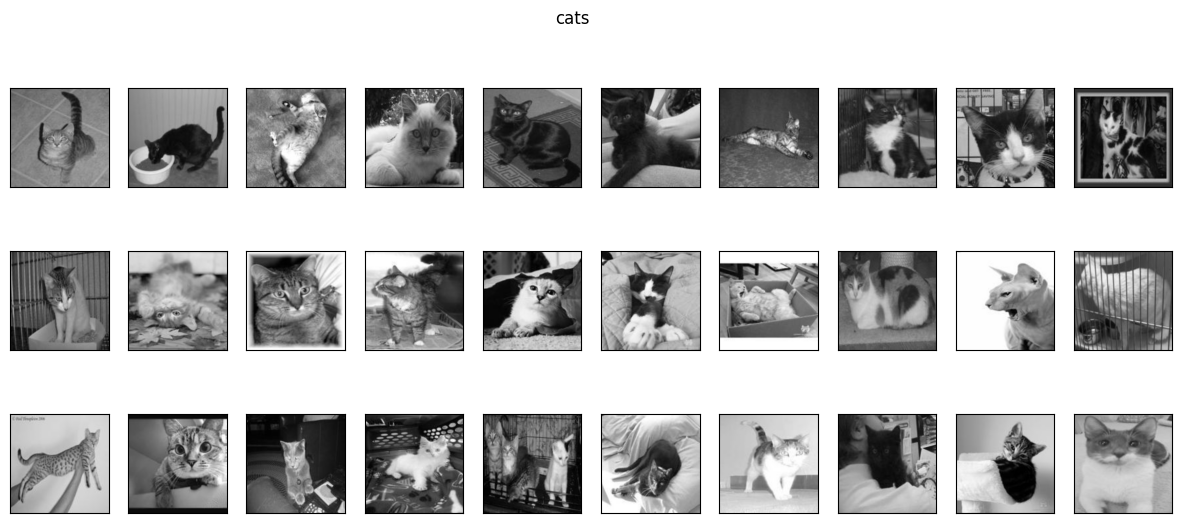

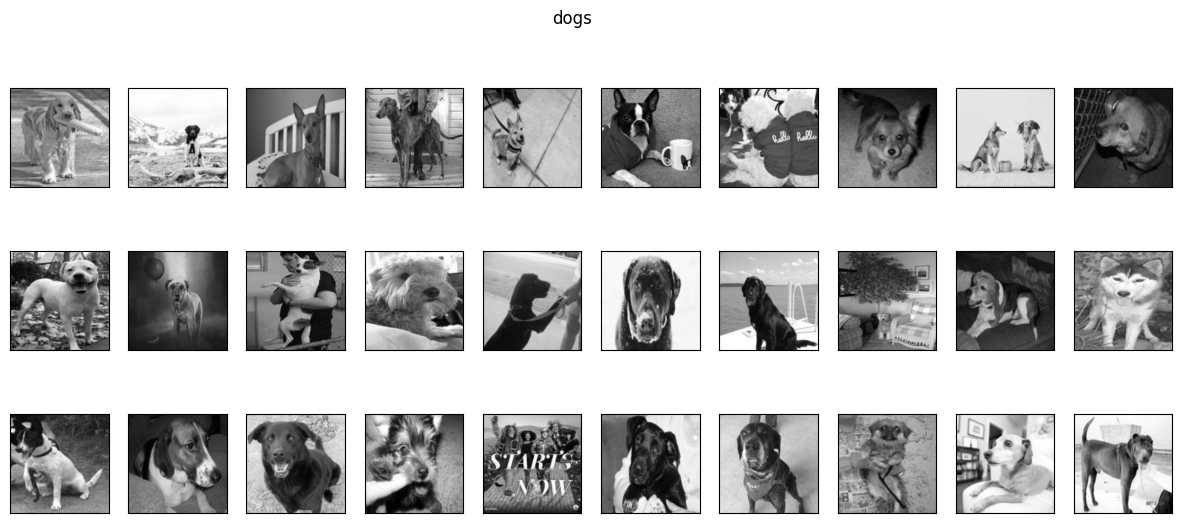

In [67]:
plot_samples(X_train, y_train, labels, 30)